In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'Times New Roman'
})


In [ ]:
# Generate 2D trajectories for inference

t1,t2,dt = 0, 2000, 1e-3
sf = int(1/dt) 
n = (t2-t1)*sf
t = np.linspace(t1,t2,n)

kb, gamma = 1, 1
b, k, th = 1, 1, np.pi/4

d = 0.1

D1= 1
x1, x2 = np.zeros([n,1]), np.zeros([n,1])
inum = 0

for i in range(n-1):
    x1[i+1,inum] = x1[i,inum] - (dt/gamma)*(-4*b*x1[i,inum]*np.cos(th)**2 + 4*x1[i,inum]**3*np.cos(th)**4 + 4*b*x2[i,inum]*np.cos(th)*np.sin(th) + k*x2[i,inum]*np.cos(th)*np.sin(th) - 12*x1[i,inum]**2*x2[i,inum]*np.cos(th)**3*np.sin(th) + k*x1[i,inum]*np.sin(th)**2+ 12*x1[i,inum]*x2[i,inum]**2*np.cos(th)**2*np.sin(th)**2 - 4*x2[i,inum]**3*np.cos(th)*np.sin(th)**3)+ np.sqrt(2*D1*dt)*np.random.normal(0,1)
    x2[i+1,inum] = x2[i,inum] -(dt/gamma)*(k*x2[i,inum]*np.cos(th)**2 + 4*b*x1[i,inum]*np.cos(th)*np.sin(th) + k*x1[i,inum]*np.cos(th)*np.sin(th) -4*x1[i,inum]**3*np.cos(th)**3*np.sin(th) - 4*b*x2[i,inum]*np.sin(th)**2 + 12*x1[i,inum]**2*x2[i,inum]*np.cos(th)**2*np.sin(th)**2 - 12*x1[i,inum]*x2[i,inum]**2*np.cos(th)*np.sin(th)**3 + 4*x2[i,inum]**3*np.sin(th)**4)+ np.sqrt(2*D1*d*dt)*np.random.normal(0,1)
    
X1, X2 = x1[-1,inum], x2[-1,inum]
x1[0,inum] = X1
x2[0,inum] = X2

for i in range(n-1):
    x1[i+1,inum] = x1[i,inum] - (dt/gamma)*(-4*b*x1[i,inum]*np.cos(th)**2 + 4*x1[i,inum]**3*np.cos(th)**4 + 4*b*x2[i,inum]*np.cos(th)*np.sin(th) + k*x2[i,inum]*np.cos(th)*np.sin(th) - 12*x1[i,inum]**2*x2[i,inum]*np.cos(th)**3*np.sin(th) + k*x1[i,inum]*np.sin(th)**2+ 12*x1[i,inum]*x2[i,inum]**2*np.cos(th)**2*np.sin(th)**2 - 4*x2[i,inum]**3*np.cos(th)*np.sin(th)**3)+ np.sqrt(2*D1*dt)*np.random.normal(0,1)
    x2[i+1,inum] = x2[i,inum] -(dt/gamma)*(k*x2[i,inum]*np.cos(th)**2 + 4*b*x1[i,inum]*np.cos(th)*np.sin(th) + k*x1[i,inum]*np.cos(th)*np.sin(th) -4*x1[i,inum]**3*np.cos(th)**3*np.sin(th) - 4*b*x2[i,inum]*np.sin(th)**2 + 12*x1[i,inum]**2*x2[i,inum]*np.cos(th)**2*np.sin(th)**2 - 12*x1[i,inum]*x2[i,inum]**2*np.cos(th)*np.sin(th)**3 + 4*x2[i,inum]**3*np.sin(th)**4)+ np.sqrt(2*D1*d*dt)*np.random.normal(0,1)
    


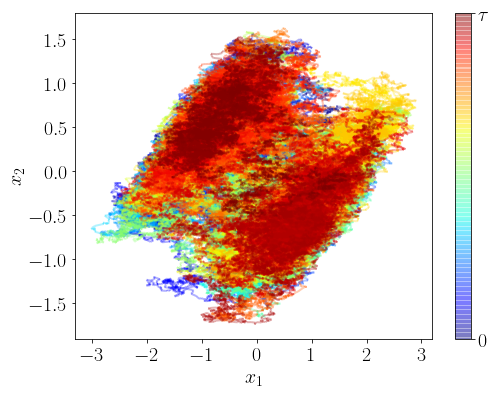

In [ ]:
#plotting of 2D trajectories

from matplotlib.collections import LineCollection
#sig = np.array(local_ep) 
treq = 500000          #less number of points used for plotting
tt = t[:treq]
fig1, ax = plt.subplots(figsize=(8, 6))


points = np.array([x1[:treq], x2[:treq]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


lc = LineCollection(segments, cmap='jet', alpha = 0.3, norm=plt.Normalize(0, np.max(tt)))
lc.set_array(tt.flatten())
lc.set_linewidth(2)

# Plot    
ax.add_collection(lc)
ax.autoscale()  


cbar = plt.colorbar(lc, ax=ax)
cbar.set_ticks([0, np.max(tt)])  
cbar.set_ticklabels([r'$0$', r'$\tau$'])  #
cbar.ax.tick_params(labelsize=20)

plt.xlabel(r'$x_1$',fontsize=20)
plt.ylabel(r'$x_2$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('brgy_dw_traj.png', format='png',bbox_inches="tight" ,dpi=1200)
plt.show()



In [94]:
from matplotlib.colors import ListedColormap

# Extract half of the original jet colormap
original_jet = plt.cm.get_cmap('jet', 256)  # Full jet colormap
half_jet_colors = original_jet(np.linspace(0.5, 1, 128), alpha = 1)  # Take the first half
half_jet = ListedColormap(half_jet_colors)

ANN

In [ ]:
# neural network architecture
import torch
import torch.nn as nn


class DeepRitz_block(nn.Module):
    def __init__(self, h_size):
        super(DeepRitz_block, self).__init__()
        self.dim_h = h_size

        self.activation_function = nn.Tanh()
        block = [nn.Linear(self.dim_h, self.dim_h),
                 self.activation_function,
                 nn.Linear(self.dim_h, self.dim_h),
                 self.activation_function]
        self._block = nn.Sequential(*block)
    def forward(self, x):
        return self._block(x) + x

In [99]:
class Neural_Network(nn.Module):
    def __init__(self, in_size, h_size = 10, block_size = 1, dev="cpu"):
        super(Neural_Network, self).__init__()
        self.num_blocks = block_size
        self.dim_x = in_size
        self.dim_h = h_size
        self.dev = dev
        self.dim_input = self.dim_x
        
        # assemble the neural network with DeepRitz blocks
        self._block = DeepRitz_block(self.dim_h)
        if self.dim_h > self.dim_input:
            model = [nn.ConstantPad1d((0, self.dim_h - self.dim_input), 0)]
        else:
            model = [nn.Linear(self.dim_input, self.dim_h)]
        for _ in range(self.num_blocks):
            model.append(self._block)
        model.append(nn.Linear(self.dim_h, self.dim_x))
        self._model = nn.Sequential(*model)

    def forward(self, x):
        return self._model(x)

In [100]:
dim_x, dim_h, num_blocks = 2, 10, 2

dev = "cuda:0" if torch.cuda.is_available() else "cpu"
print(dev)
neural_network = Neural_Network(dim_x, dim_h, num_blocks, dev).to(dev)

cpu


In [ ]:
# training 
x = np.column_stack((x1[:,0] , x2[:,0]))
xt = torch.from_numpy(x)
xt= xt.float()
xt.shape

force_network = neural_network
y = xt
length = y.shape[0]
data = y[:length,:]
data_mid = 0.5*(data[1:,:] + data[0:-1,:])
data_diff = data[1:,:]-data[:-1,:]
optimizer = torch.optim.Adadelta(force_network.parameters(), lr = 1e-2)
All_loss_train = []
L = data.shape[0]-1
for epoch in range(10000):
    force_network.train()
    optimizer.zero_grad()
    data_mid_batch = data_mid 
    data_diff_batch = data_diff 
    dxmid = force_network(data_mid_batch)
    xdiff = data_diff_batch
    jj = torch.sum(dxmid*xdiff, dim = 1)
    loss = -2*torch.mean(jj)**2/(dt*torch.var(jj))
    loss.backward()
    optimizer.step()
    if epoch%1000 == 0:
        print(epoch, -loss.item())
    #torch.save(force_network.state_dict(), f'saved_params/force_network_params_epoch_{epoch}.pt')
    All_loss_train.append(-loss.item())



0 0.001101491041481495
1000 1.3469237089157104
2000 2.8621819019317627
3000 6.119880676269531
4000 7.8255791664123535
5000 8.246854782104492
6000 8.395684242248535
7000 8.452085494995117
8000 8.518739700317383
9000 8.56456470489502


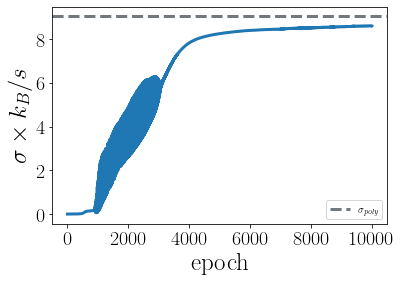

In [ ]:
fig2 = plt.figure()
plt.axhline(sig_poly, label = r'$\sigma_{poly}$', color = '#71797E',linewidth = 3, linestyle='dashed')
plt.plot(All_loss_train, linewidth = 3)
plt.xlabel(r'epoch',fontsize=25)
plt.ylabel(r'$\sigma \times k_B/s$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
#plt.savefig('learning_curve_brgy_ann.png', format='png',bbox_inches="tight" ,dpi=1200)
plt.show()

In [ ]:
# estimate proportionality constant and then the local entropy current
traj_points = xt
traj_points.shape
traj_midpoints = 0.5*(xt[1:,:] + xt[:-1,:])

with torch.no_grad():
    force_field_trajectory = force_network(traj_midpoints).cpu().numpy()
   
# Extract the force components (U, V) along the trajectory
U_trajectory = force_field_trajectory[:, 0]  # Force component in the x-direction
V_trajectory = force_field_trajectory[:, 1]  # Force component in the y-direction


data_diff_tensor = data_diff.float()

# Perform element-wise multiplication
# find out the constant factor such that F = cd*
optim_jj = torch.mul(torch.from_numpy(U_trajectory), data_diff_tensor[:, 0]) + \
           torch.mul(torch.from_numpy(V_trajectory), data_diff_tensor[:, 1])

const_fact =  2*torch.mean(optim_jj)/torch.var(optim_jj)

print(const_fact)

# estimate local entropy current
local_ep = (torch.mul(torch.from_numpy(U_trajectory), data_diff_tensor[:, 0]) + \
           torch.mul(torch.from_numpy(V_trajectory), data_diff_tensor[:, 1]))*const_fact


tensor(-112.7445)


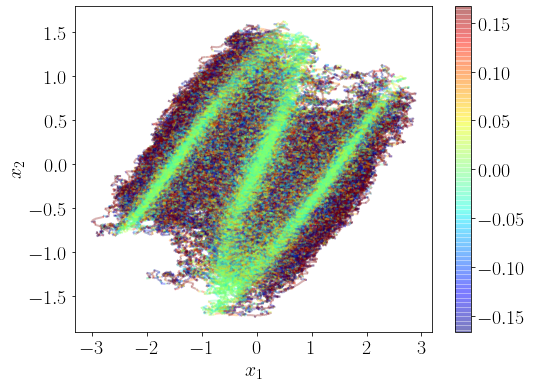

In [ ]:
# localised entropy production along the trajectories
from matplotlib.collections import LineCollection
#sig = np.array(local_ep) 
sig = local_ep
fig, ax = plt.subplots(figsize=(8, 6))



#points = np.array([x1[:-1], x2[:-1]]).T.reshape(-1, 1, 2)
points = np.array([x1[:treq], x2[:treq]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

med_value = 50*np.array(torch.median(local_ep))

lc = LineCollection(segments, cmap='jet',alpha = 0.3, norm=plt.Normalize(-med_value, med_value))
lc.set_array(sig.flatten())
lc.set_linewidth(2)

# Plot    
ax.add_collection(lc)
ax.autoscale()  

cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20)

plt.xlabel(r'$x_1$',fontsize=20)
plt.ylabel(r'$x_2$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('brgy_dw_local_ep_ann.png', format='png',bbox_inches="tight" ,dpi=1200)
plt.show()


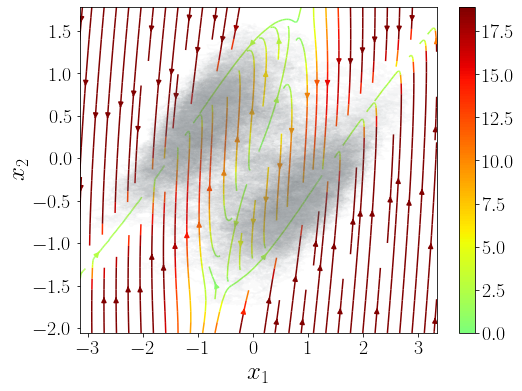

In [ ]:
#thermodynamic force field

x_vals = np.linspace(x1[:, 0].min(), x1[:, 0].max(), 50)
y_vals = np.linspace(x2[:, 0].min(), x2[:, 0].max(), 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Prepare the grid for input into the network
grid = np.stack([X.ravel(), Y.ravel()], axis=1)
grid_tensor = torch.tensor(grid, dtype=torch.float32).to(dev)

# Get force field from the network
with torch.no_grad():
    force_field = neural_network(grid_tensor).cpu().numpy()

const_fact_ = np.array(const_fact) 
# Reshape the force field to match the grid
U = const_fact_*force_field[:, 0].reshape(X.shape)
V = const_fact_*force_field[:, 1].reshape(Y.shape)

magnitude_f_ann = np.sqrt(U**2 + V**2)
max_val_f_ann = np.median(magnitude_f_ann)

trqn=np.arange(0,treq,10)
# Plot the streamline
fig4 = plt.figure(figsize=(8, 6))
plt.plot(x1[trqn,0],x2[trqn,0],color = '#71797E',alpha=0.3)
plt.streamplot(X, Y, U, V, color=magnitude_f_ann, cmap=half_jet, norm=plt.Normalize(0, max_val_f_ann))

plt.xlabel(r'$x_1$',fontsize=25)
plt.ylabel(r'$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.savefig('brgy_dw_ff_ANN.png', format='png',bbox_inches="tight" ,dpi=1200)
plt.show()